# SVM experiments

In the present notebook we are going to test the SVM using the sklearn implementation.


In [1]:
import pandas as pd

from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from pandas import DataFrame
from sklearn import svm
from sklearn.datasets import make_gaussian_quantiles
import warnings
warnings.filterwarnings('ignore')

We are going to generate the data using the data generator from sklearn. With some fuzzy elements, so we are going to modify the `cluster_std` value.

In [2]:
X, y = make_blobs(1000, n_features=2, centers=3, random_state=100, cluster_std=2)

Visualize the data

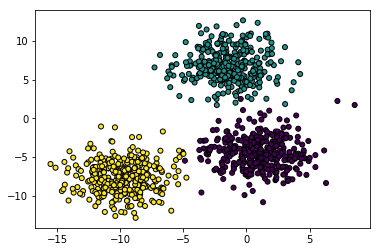

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

We need to separate the data into train and test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Lineal kernel

First we are goint to use the lineal kernel

In [5]:
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("%.2f%% of accuracy using a lineal kernel." % (accuracy_score(y_test, y_predict) * 100))

99.20% of accuracy using a lineal kernel.


## Polynomial kernel

In [6]:
model = svm.SVC(kernel='poly')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)


## Gaussian kernel

In [7]:
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("%.2f%% of accuracy using a gaussian kernel." % (accuracy_score(y_test, y_predict) * 100))

99.20% of accuracy using a gaussian kernel.


## Modifying C and gamma

As we specified using a lower C will cause to generate a bad classification, since we have a big margin in the hyperplane

In [8]:
model = svm.SVC(kernel='rbf', C=0.00001)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("%.2f%% of accuracy using a gaussian kernel with lower C value." % (accuracy_score(y_test, y_predict) * 100))

29.20% of accuracy using a gaussian kernel with lower C value.


In [9]:
model = svm.SVC(kernel='rbf', gamma=10000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("%.2f%% of accuracy using a gaussian kernel with high gamma value." % (accuracy_score(y_test, y_predict) * 100))

29.60% of accuracy using a gaussian kernel with high gamma value.


## Gaussian-like data set

We are going to use a gaussian-like data set:

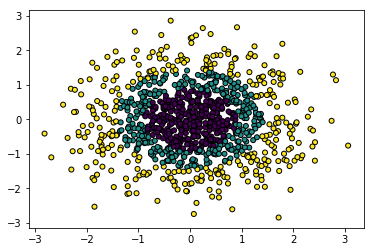

In [10]:
X, y = make_gaussian_quantiles(n_samples=1000, n_features=2, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Linear kernel

Now we are going to test the linear kernel

In [12]:
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("%.2f%% of accuracy using a Lineal kernel." % (accuracy_score(y_test, y_predict) * 100))

48.00% of accuracy using a Lineal kernel.


We can see that our score is lower, even if we set up a bigger C and lower gamma.

In [13]:
model = svm.SVC(kernel='linear', C=1000, gamma=0.0001)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("%.2f%% of accuracy using a Lineal kernel with a high C, and a lower gamma." % (accuracy_score(y_test, y_predict) * 100))

47.60% of accuracy using a Lineal kernel with a high C, and a lower gamma.


## Polinomial kernel

Now we are going to use a polinomial kernel

In [14]:
model = svm.SVC(kernel='poly')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("%.2f%% of accuracy using a Polynomial kernel." % (accuracy_score(y_test, y_predict) * 100))

46.80% of accuracy using a Polynomial kernel.


We got an improvement in the accuracy. However, we can change the C and gamma to get

In [15]:
model = svm.SVC(kernel='poly', C=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("%.2f%% of accuracy using a Polynomial kernel with a higher C value" % (accuracy_score(y_test, y_predict) * 100))

46.00% of accuracy using a Polynomial kernel with a higher C value


It doesn't represent a big improvement. Then we can try with the Gaussian kernel

## Gaussian kernel

In [16]:
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("%.2f%% of accuracy using a Gaussian kernel." % (accuracy_score(y_test, y_predict) * 100))

95.20% of accuracy using a Gaussian kernel.


Now we got a good score